# Research Notebook
## Jayce Scott
## Date: Januray 27 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

 - Developed code to simulate the mass and pressure profiles of compact objects using the Tolman–Oppenheimer–Volkoff (TOV) equations.
 - Attended the weekly research group meeting, where we discussed the results and outlined the next steps.

## Motivation:

The primary motivation for this week's activities is to establish a solid foundation in the fundamental tools that will be crucial throughout our research. Our main focus is on using the Tolman–Oppenheimer–Volkoff (TOV) equations to simulate dense astrophysical objects, such as neutron and boson stars. The work completed this week sets the groundwork for further exploration in future phases of the research. 




<span style="color: red;">Ok but how does this tie in to the overall aim of the research project. Make sure you have a clear understanding of the goals you are trying to achieve with your research.</span>

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

This weeks focus was on implementing a model that simulates the mass-radius relationship of a relativistic object using the Tolman-Oppenheimer-Volkoff (TOV) equations. It begins by defining the energy density as a function of pressure using a polytropic equation of state as mentioned in the paper (Pitz and Schaffner-Bielich 2024). All physical constants, such as the gravitational constant, speed of light, and solar mass, are defined in MeV-based units for simplicity, along with the initial pressure and integration range. The TOV equations, which describe the gradients of pressure and mass with respect to radius, are implemented with these equations/constants. These equations are numerically solved using the solve_ivp function with the RK45 method, and integration halts when the pressure drops below zero. It is important to note that these equations are only for the one fluid verison of these equations. The results, including radius, pressure  mass, are extracted and converted to physical units (kilometers for radius and solar masses for mass). Finally the data is plotted to show how the star's mass varies with its radius based on the specified equation of state. The equations are: 



$$
\frac{dp}{dr} = -\frac{G m(r) \epsilon}{r^2} \left( 1 + \frac{p}{\epsilon c^2} \right) \left( 1 + \frac{4 \pi r^3 p}{m(r) c^2} \right) \left( 1 - \frac{2 G m(r)}{r c^2} \right)^{-1}
$$

$$
\frac{dm}{dr} = 4 \pi r^2 \epsilon
$$

with the Polytropic equation of state as: 

$$
\epsilon(p) = \epsilon_0 \left( \frac{p}{\epsilon_0} \right)^{\frac{2}{n}} + \frac{n+2}{n-2} p
$$

where:

- \( p \) is the pressure,
- \( r \) is the radial coordinate,
- \( m(r) \) is the mass enclosed within radius \( r \),
- \(\epsilon\) is the energy density,
- \( G \) is the gravitational constant,
- \( c \) is the speed of light.
- \( \epsilon(p) \) is the energy density,
- \( p \) is the pressure,
- \( \epsilon_0 \) is a constant energy density parameter,
- \( n \) is the polytropic index

These equations describe the balance between gravitational collapse and internal pressure in relativistic stars. the code modelling these equations can be seen below: 

C:\Users\12897\AppData\Local\Temp/ipykernel_18548/3236632457.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(p > 0, epsilon_0 * (p / epsilon_0)**(2 / n) + (n + 2) / (n - 2) * p, 0)


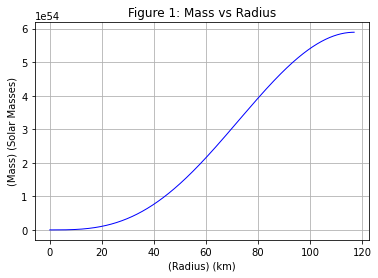

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Energy density as a function of pressure (Given from Paper)
def energy_density(p, epsilon_0, n):
    return np.where(p > 0, epsilon_0 * (p / epsilon_0)**(2 / n) + (n + 2) / (n - 2) * p, 0)

# Define constants in MeV units
G = 6.7086e-45 * 1e6  # Gravitational constant in MeV^-2
c = 1
M_sun = 1.1158e60 / 1e6  # Solar mass in MeV/c^2
masslist = []

epsilon_0 = 500 # Energy Constant in MeV^4
n = 4  # Polytropic index
p0 = 1  # Initial pressure in MeV/fm³
m0 = 0  # Initial mass in MeV

IntCon = [p0, m0]  # Initial conditions
R_Int = [1*5.0677e15 / 1e6, 200*5.0677e15]  # Distance in MEv-1

p_eval=np.linspace(1, 1000, 1000)

# ODE system
def f(r, y):
    p, m = y
    epsilon = energy_density(p, epsilon_0, n)  # Compute energy density

    if p <= 0 or r <= 0:  # Avoid singularities
        return [0, 0]

    # Pressure gradient (dpdr) from TOV w/r to epsilon
    dpdr = (-epsilon * G * m / r**2) * (1 + p / (epsilon * c**2)) * \
           (1 + 4 * np.pi * r**3 * p / ((m + 1e-10) * c**2)) * \
           (1 - 2 * G * m / (r * c**2))**(-1)

    # Mass gradient (dmdr)
    dmdr = 4 * np.pi * (r**2) * epsilon
    return [dpdr, dmdr]

# Stop integration when pressure becomes negligible
def p0_equals_zero(r, y):
    p, _ = y
    return p

p0_equals_zero.terminal = True
p0_equals_zero.direction = -1

# Solve the ODE
solutionsRel = solve_ivp(
    f,
    R_Int,
    IntCon,
    method='RK45',
    t_eval=np.linspace(R_Int[0], R_Int[1], 10000),
    events=p0_equals_zero,
    dense_output=True,
    rtol=1e-6,
    atol=1e-8
)

# Extract results
radius_rel = solutionsRel.t / (5.0677e15)  # Convert radius back to km
pressure_rel = solutionsRel.y[0]  # Pressure in MeV/cm³
mass_rel = solutionsRel.y[1]  # Mass in MeV
energy_density_rel = energy_density(pressure_rel, epsilon_0, n)  # Compute energy density in MeV/fm³

# Normalize mass to solar masses
mass_rel_solar = mass_rel / (M_sun)  # Convert Ev mass to solar masses from (Mev)

masslist.append((mass_rel_solar[-1]))

# Plotting
plt.plot(radius_rel, mass_rel, color="blue", lw=1)


plt.title("Figure 1: Mass vs Radius")
plt.xlabel("(Radius) (km)")
plt.ylabel("(Mass) (Solar Masses)")
plt.grid()
plt.show()

<span style="color: red;">Very nice code and plot.</span>

# 3: So what? (What does it mean?)
## Describe your results

My results illustrate the mass-radius relationship for a relativistic compact object, modeled using the Tolman-Oppenheimer-Volkoff (TOV) equations with a polytropic equation of state. The overall "Shape" aligns with expected theoretical behavior, displaying a cubic falloff in mass as a function of radius. However, there are discrepancies in the orders of magnitude, which could result from issues with parameter scaling or numerical precision. Despite these challenges, the general "shape" of the curve appears consistent with what is required for this project. Moving forward, I plan to investigate possible numerical instabilities, refine the pressure scale, and compare my findings with observational data to ensure consistency with known neutron and boson star properties. These adjustments will help improve the accuracy and reliability of my model in future iterations



<span style="color: red;">Be more specific about what you mean by 'consistent with what is required for this project.' Explain the mass-radius plot and why you get the shape you do for the inputs you used.</span>

# 4. Now what? (What's next?)
## Plan for the next week

Next week, the plan is to extend the current code and equations to a two-fluid model, incorporating the additional complexity of multiple components. I will use the equations provided above, along with those from the referenced paper, to analyze how the presence of a second mass-type affects the mass-radius relationship and overall stability of the system. Additionally, I personally will focus on studying the accretion rate and escape radius of these compact objects through numerical simulations. This will involve refining my integration methods and ensuring that the physical parameters remain within realistic bounds. By the end of the week, I aim to have preliminary results that offer insights into how multi-fluid effects influence the structure and evolution of these objects.

<span style="color: red;">Good, how can you tie this back to the overall motivation and how these next steps further the aims of the project.</span>

# 5. Bibliography

Your references here

Pitz, S. L., & Schaffner-Bielich, J. (2024). Generating ultra-compact neutron stars with bosonic dark matter. arXiv. https://arxiv.org/abs/2408.13157

| Category       | Points      |
| ------------- |:------------:|
| Formatting    |       2       |
| Experience    |       1       |
| What?         |       2       |
| So what?      |       2       |
| Now what?     |       2       |
| Bibliography  |       3       |
| Style         |       3       |
| Total         |       15      |